In [1]:
import pathlib

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from transforms import transforms

IMG_DIR = pathlib.Path("images/")

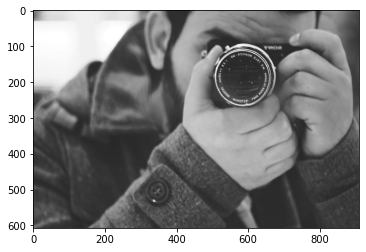

In [9]:
img = cv2.imread(str(IMG_DIR / "photo_man.jpg"), flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()

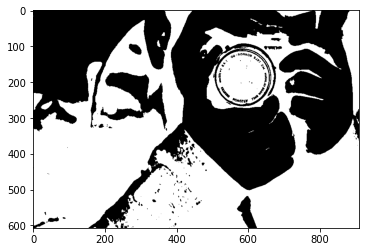

In [40]:
threshold = 100
img_binary = np.where(img > threshold, 1, 0).astype(np.uint8)  # type: ignore
plt.imshow(img_binary, cmap="binary")
plt.show()

### Structuring Element - Binary Morphology
The basic idea in binary morphology is to probe an image with a simple, pre-defined shape, drawing conclusions on how this shape fits or misses the shapes in the image. This simple "probe" is called the structuring element, and is itself a binary image (i.e., a subset of the space or grid).

In [41]:
k_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
k_rect

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [42]:
k_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
k_ellipse

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [43]:
k_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
k_cross

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### Erosion

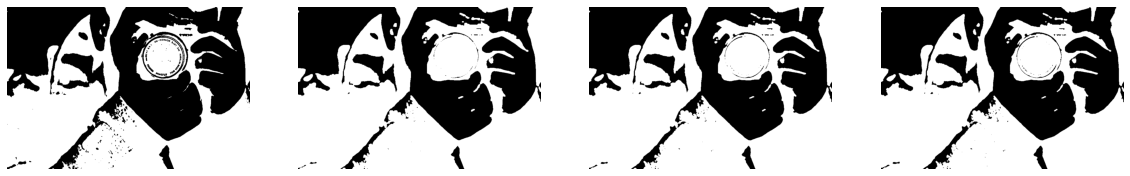

In [56]:
rect_erosion = cv2.erode(img_binary, k_rect)
ellipse_erosion = cv2.erode(img_binary, k_ellipse)
cross_erosion = cv2.erode(img_binary, k_cross)

plt.figure(figsize=(20, 10))
plt.subplot(141)
plt.imshow(img_binary, cmap="binary")
plt.axis("off")
plt.subplot(142)
plt.imshow(rect_erosion, cmap="binary")
plt.axis("off")
plt.subplot(143)
plt.imshow(ellipse_erosion, cmap="binary")
plt.axis("off")
plt.subplot(144)
plt.imshow(cross_erosion, cmap="binary")
plt.axis("off")
plt.show()

### Dilation

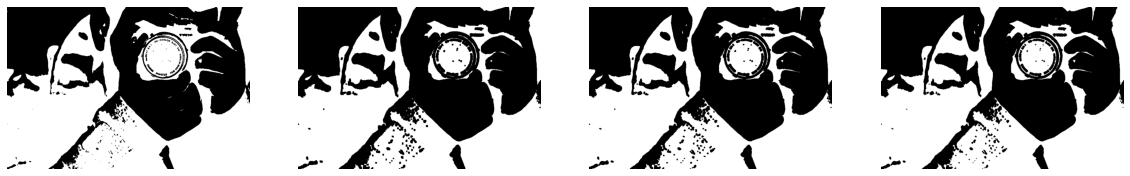

In [57]:
rect_dilation = cv2.dilate(img_binary, k_rect)
ellipse_dilation = cv2.dilate(img_binary, k_ellipse)
cross_dilation = cv2.dilate(img_binary, k_cross)

plt.figure(figsize=(20, 10))
plt.subplot(141)
plt.imshow(img_binary, cmap="binary")
plt.axis("off")
plt.subplot(142)
plt.imshow(rect_dilation, cmap="binary")
plt.axis("off")
plt.subplot(143)
plt.imshow(ellipse_dilation, cmap="binary")
plt.axis("off")
plt.subplot(144)
plt.imshow(cross_dilation, cmap="binary")
plt.axis("off")
plt.show()

### Opening - Erosion followed by Dilation

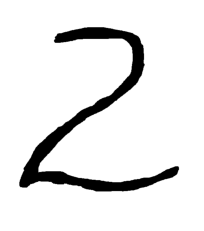

In [77]:
img = cv2.imread(str(IMG_DIR / "two.png"), flags=cv2.IMREAD_GRAYSCALE)
threshold = 100
img_binary = np.where(img > threshold, 1, 0).astype(np.uint8)  # type: ignore
plt.imshow(img_binary, cmap="binary")
plt.axis("off")
plt.show()

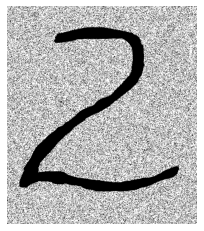

In [92]:
np.random.seed(42)

noise = np.random.rand(*img_binary.shape)
noise = np.where(noise > 0.75, 1, 0).astype(np.uint8)
img_with_noise = img_binary | noise
plt.imshow(img_with_noise, cmap="binary")
plt.axis("off")
plt.show()

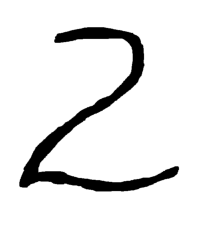

In [94]:
img_denoised = cv2.morphologyEx(img_with_noise, cv2.MORPH_OPEN, k_rect)
plt.imshow(img_denoised, cmap="binary")
plt.axis("off")
plt.show()

### Closing - Dilation followed by Erosion

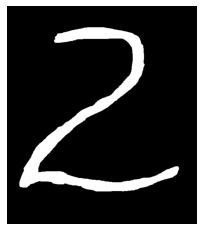

In [102]:
img = cv2.imread(str(IMG_DIR / "two.png"), flags=cv2.IMREAD_GRAYSCALE)
threshold = 100
img_binary = np.where(img < threshold, 1, 0).astype(np.uint8)  # type: ignore
plt.imshow(img_binary, cmap="binary")
plt.axis("off")
plt.show()

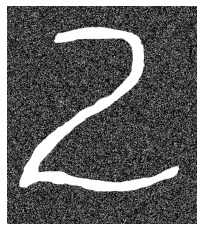

In [110]:
np.random.seed(42)

noise = np.random.rand(*img_binary.shape)
noise = np.where(noise > 0.75, 0, 1).astype(np.uint8)
img_with_noise = img_binary & noise
plt.imshow(img_with_noise, cmap="binary")
plt.axis("off")
plt.show()

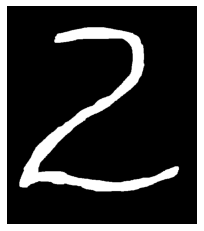

In [111]:
img_denoised = cv2.morphologyEx(img_with_noise, cv2.MORPH_CLOSE, k_rect)
plt.imshow(img_denoised, cmap="binary")
plt.axis("off")
plt.show()